# Setup & Import Libraries

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("/content/drive/MyDrive/deep_learning/spaceship_titanic")
%ls

data/  kaggle.json  notebooks/  reports/  test.npz


# Load Dataset

In [41]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [104]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory Data Analysis - EDA

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df = df.astype({"CryoSleep": bool, "VIP": bool, "Transported": int})

In [105]:
print(f"Amount of samples: {len(df_train)}")

Amount of samples: 8693


## Look at the group in PassengerId

In [42]:
df[["Group", "Id"]] = df["PassengerId"].str.split('_', expand=True)
df = df.drop(["PassengerId"], axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [43]:
df.shape

(8693, 15)

**According to data description, exist people in the same groub, but splitted by the train and test**

In [44]:
df_test = pd.read_csv("data/test.csv")
df_test[["Group", "Id"]] = df_test["PassengerId"].str.split('_', expand=True)
df_test = df_test.drop(["PassengerId"], axis=1)
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Id
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


In [45]:
df_test.shape

(4277, 14)

In [52]:
all_data = df.append(df_test).reset_index(drop=True)
all_data = all_data.sort_values("Group")

all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [53]:
all_data.shape

(12970, 15)

## Checking if exist missing values

**Adding indicator called mark for the missing value**

In [54]:
all_data_nan = all_data.isna().astype(int)
all_data_nan = all_data_nan.drop(["Transported", "Group", "Id"], axis=1)
all_data_nan.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
all_data_nan.shape

(12970, 12)

**Put all features that have nan in the same data**

In [56]:
all_data = all_data.join(all_data_nan, rsuffix="_nan")
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,0,0,0,0,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,0,0,0,0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,0,0,0,0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
all_data.shape

(12970, 27)

**Group by for the group feature**

In [58]:
grouped = all_data.groupby('Group')
new_dataframe = pd.concat([group for name, group in grouped][:])
new_dataframe.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,0,0,0,0,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,0,0,0,0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,0,0,0,0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
len(new_dataframe)

12970

In [60]:
new_dataframe = new_dataframe.drop_duplicates().sort_values('Group') # Again, we sort by group to make things right
len(new_dataframe)

12970

In [65]:
def create_new_dataframe(dataframe):
    new_dataframe = pd.DataFrame()
    for i in range(len(dataframe)):
        try:
            if (dataframe.iloc[i, 13] == dataframe.iloc[i+1, 13]):
                new_dataframe = new_dataframe.append(dataframe.iloc[i])
                new_dataframe = new_dataframe.append(dataframe.iloc[i+1])
        except:
            pass
    return new_dataframe

In [66]:
new_dataframe = create_new_dataframe(all_data)
new_dataframe.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
new_dataframe.shape

(7380, 27)

In [68]:
new_dataframe = new_dataframe.drop_duplicates().sort_values('Group') # Again, we sort by group to make things right
new_dataframe.shape

(5825, 27)

In [69]:
group = new_dataframe['Group'].unique()
group

array(['0003', '0006', '0008', ..., '9272', '9275', '9280'], dtype=object)

In [70]:
inspected_col = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Name', 'VIP']
inspected_col_spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [74]:
def input_missing_values(dataframe, new_dataframe, inspected_col, group, categorical=True):
    if (categorical):
        for col in range(len(inspected_col)):
            for g in range(len(group)):
                try:
                    tofill = dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]].mode()[0]
                except:
                    tofill = dataframe[inspected_col[col]].mode()[0]
                dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]] = dataframe.loc[
                    dataframe["Group"] == group[g], inspected_col[col]].fillna(tofill)
                new_dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]] = new_dataframe.loc[
                    dataframe["Group"] == group[g], inspected_col[col]].fillna(tofill)
    else:
        for col in range(len(inspected_col)):
            for g in range(len(group)):
                try:
                    tofill = dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]].min()
                except:
                    tofill = dataframe[inspected_col[col]].median()
                dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]] = dataframe.loc[
                    dataframe["Group"] == group[g], inspected_col[col]].fillna(tofill)
                new_dataframe.loc[dataframe["Group"] == group[g], inspected_col[col]] = new_dataframe.loc[
                    dataframe["Group"] == group[g], inspected_col[col]].fillna(tofill)
    return dataframe, new_dataframe

In [72]:
all_data, new_dataframe = input_missing_values(all_data, new_dataframe, inspected_col, group)

In [73]:
new_dataframe.isna().sum()

HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                  128
VIP                    0
RoomService          105
FoodCourt            129
ShoppingMall         143
Spa                  124
VRDeck               117
Name                   0
Transported         1937
Group                  0
Id                     0
HomePlanet_nan         0
CryoSleep_nan          0
Cabin_nan              0
Destination_nan        0
Age_nan                0
VIP_nan                0
RoomService_nan        0
FoodCourt_nan          0
ShoppingMall_nan       0
Spa_nan                0
VRDeck_nan             0
Name_nan               0
dtype: int64

In [75]:
all_data, new_dataframe = input_missing_values(all_data, new_dataframe, inspected_col_spend, group, categorical=False)

In [76]:
new_dataframe.isna().sum()

HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                  128
VIP                    0
RoomService            2
FoodCourt              2
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                   0
Transported         1937
Group                  0
Id                     0
HomePlanet_nan         0
CryoSleep_nan          0
Cabin_nan              0
Destination_nan        0
Age_nan                0
VIP_nan                0
RoomService_nan        0
FoodCourt_nan          0
ShoppingMall_nan       0
Spa_nan                0
VRDeck_nan             0
Name_nan               0
dtype: int64

In [77]:
all_data.isna().sum()

HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                  270
VIP                   53
RoomService          160
FoodCourt            162
ShoppingMall         163
Spa                  160
VRDeck               151
Name                   0
Transported         4277
Group                  0
Id                     0
HomePlanet_nan         0
CryoSleep_nan          0
Cabin_nan              0
Destination_nan        0
Age_nan                0
VIP_nan                0
RoomService_nan        0
FoodCourt_nan          0
ShoppingMall_nan       0
Spa_nan                0
VRDeck_nan             0
Name_nan               0
dtype: int64

In [78]:
def plot_nan_values(dataframe):
    plt.figure(figsize=(10,5))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cmap="viridis")
    plt.ylabel("N observations")
    plt.xlabel("Features")
    plt.show()

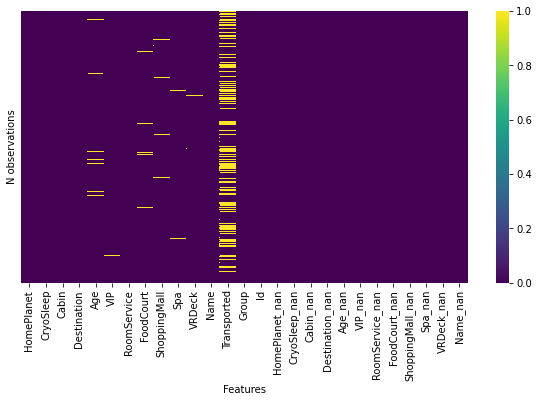

In [79]:
plot_nan_values(all_data) # The transported is because the test samples we don't have target available

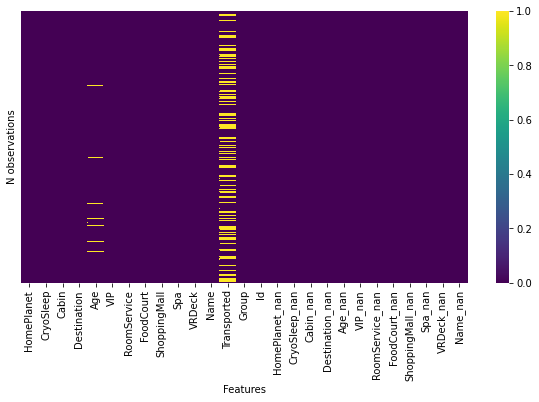

In [80]:
plot_nan_values(new_dataframe) # The transported is because the test samples we don't have target available

## Split Cabin and Name features

* Cabin contatins: deck, number and side;
* Name has: first name and last name.

In [81]:
all_data["Cabin"].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [82]:
all_data["Name"].head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

In [83]:
all_data[["deck", "num", "side"]] = all_data["Cabin"].str.split('/', expand=True)
all_data[["FirstName", "LastName"]] = all_data["Name"].str.split(' ', expand=True)
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan,deck,num,side,FirstName,LastName
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,B,0,P,Maham,Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,F,0,S,Juanna,Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,A,0,S,Altark,Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,A,0,S,Solam,Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,F,1,S,Willy,Santantines


## Drop unecessary column

In [84]:
all_data = all_data.drop(["Cabin", "Name", "Group", "Id", "FirstName"], axis=1)
all_data["num"] = all_data["num"].astype(float)

## Handle with continous and categorical Variables

In [86]:
numerical = all_data.select_dtypes(float).columns.tolist()
categorical = [col for col in all_data.columns if not col in numerical and not col == "Transported"]

## Handle with only individuals with simple missing values input

In [88]:
def simple_missing_value(numerical, categorical, dataframe):
    for num in numerical:
        dataframe[num].fillna(dataframe[num].median(), inplace=True)
    for cat in categorical:
        dataframe[cat].fillna(dataframe[cat].mode()[0], inplace=True)
    return dataframe

In [89]:
all_data = simple_missing_value(numerical, categorical, all_data)

In [91]:
all_data.isna().sum()

HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Transported         4277
HomePlanet_nan         0
CryoSleep_nan          0
Cabin_nan              0
Destination_nan        0
Age_nan                0
VIP_nan                0
RoomService_nan        0
FoodCourt_nan          0
ShoppingMall_nan       0
Spa_nan                0
VRDeck_nan             0
Name_nan               0
deck                   0
num                    0
side                   0
LastName               0
dtype: int64

## Look into numerical features (Multivariate Analysis)

In [93]:
numerical

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'num']

In [94]:
def plot_multivariate_analysis(dataframe, hue="Transported"):
    fig = plt.figure(figsize=(10,5))
    sns.pairplot(dataframe, hue=hue, height=2)
    plt.show()

<Figure size 720x360 with 0 Axes>

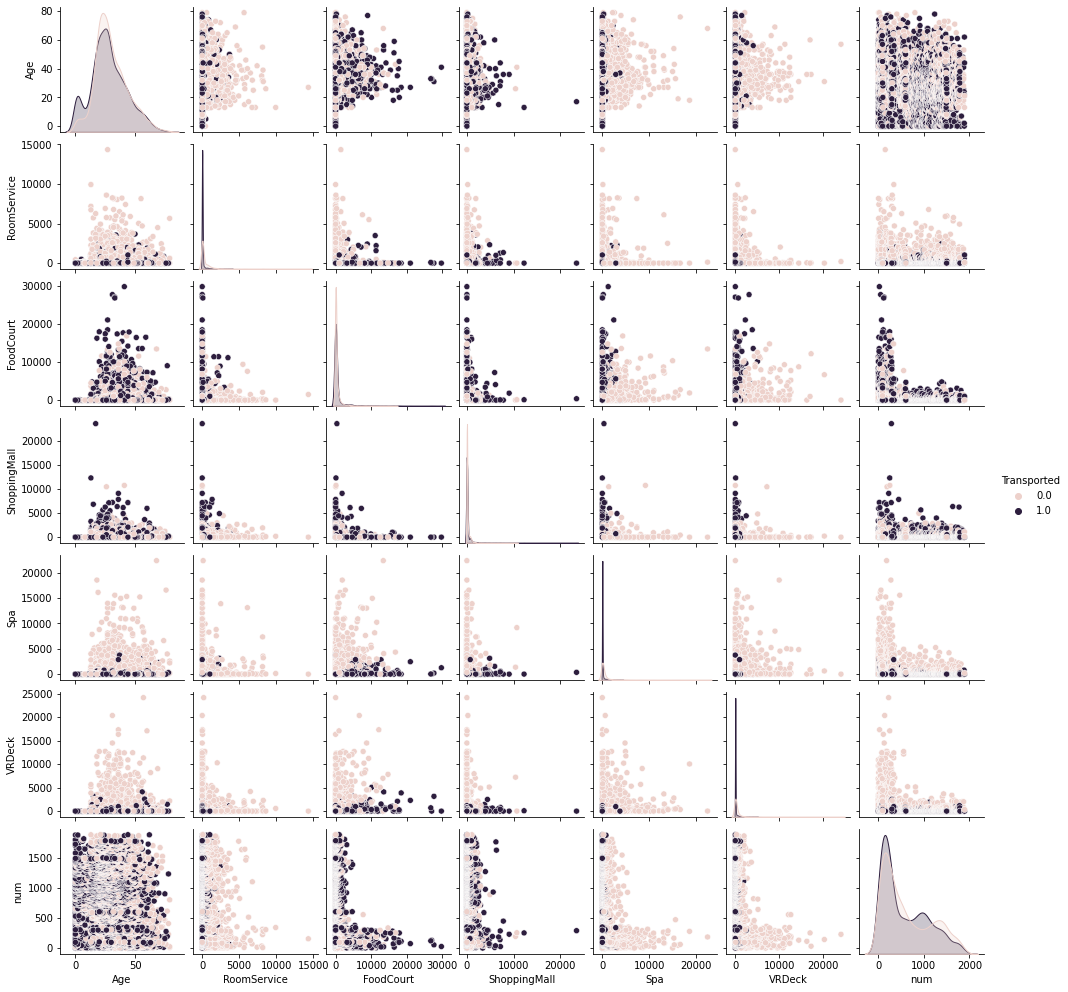

In [96]:
plot_multivariate_analysis(all_data[numerical+["Transported"]])

# Preprocessing

## Feature Engineer



> Create relative feature using the last name for group people has the last name
in common




In [97]:
all_data["common"] = all_data["LastName"].apply(lambda x: sum(x==all_data["LastName"]) - 1)
all_data = all_data.drop(["LastName"], axis=1)
categorical.remove("LastName")
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,RoomService_nan,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan,deck,num,side,common
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,B,0.0,P,3
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,0,F,0.0,S,3
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,A,0.0,S,6
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,A,0.0,S,6
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,0,F,1.0,S,8


In [168]:
all_data = all_data.sort_index()
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,RoomService_nan,FoodCourt_nan,ShoppingMall_nan,Spa_nan,VRDeck_nan,Name_nan,deck,num,side,common
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,B,0.0,P,3
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,0,F,0.0,S,3
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,A,0.0,S,6
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,A,0.0,S,6
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,0,F,1.0,S,8


## Return all data to train and test set

In [169]:
all_data.shape

(12970, 27)

In [170]:
df_train = all_data.iloc[0:len(df_train)]

In [171]:
df_train.shape

(8693, 27)

In [172]:
df_test = all_data.iloc[len(df_train): len(df_train)+len(df_test)].reset_index(drop=True)

In [173]:
df_test.shape

(4277, 27)

## Split the train data into features and target

In [174]:
# target = df_non_nan.Transported.replace({False: 0, True: 1}) # target
target = df_train.Transported
data = df_train.drop(["Transported"], axis= 1)

In [175]:
target.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [176]:
np.unique(target)

array([False, True], dtype=object)

In [177]:
print(f"Event Rate: {round(target.mean()*100, 2)}%") # in othe word, this case can be a balanced problem

Event Rate: 50.36%


In [126]:
data.dtypes

HomePlanet           object
CryoSleep              bool
Destination          object
Age                 float64
VIP                    bool
RoomService         float64
FoodCourt           float64
ShoppingMall        float64
Spa                 float64
VRDeck              float64
HomePlanet_nan        int64
CryoSleep_nan         int64
Cabin_nan             int64
Destination_nan       int64
Age_nan               int64
VIP_nan               int64
RoomService_nan       int64
FoodCourt_nan         int64
ShoppingMall_nan      int64
Spa_nan               int64
VRDeck_nan            int64
Name_nan              int64
deck                 object
num                 float64
side                 object
common                int64
dtype: object

## Split features into numerical and categorical

In [178]:
numerical_features = data.select_dtypes(include=float)
categorical_features = data.select_dtypes(include=["object", "bool", "int"])

In [179]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   num           8693 non-null   float64
dtypes: float64(7)
memory usage: 543.3 KB


In [180]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HomePlanet        8693 non-null   object
 1   CryoSleep         8693 non-null   bool  
 2   Destination       8693 non-null   object
 3   VIP               8693 non-null   bool  
 4   HomePlanet_nan    8693 non-null   int64 
 5   CryoSleep_nan     8693 non-null   int64 
 6   Cabin_nan         8693 non-null   int64 
 7   Destination_nan   8693 non-null   int64 
 8   Age_nan           8693 non-null   int64 
 9   VIP_nan           8693 non-null   int64 
 10  RoomService_nan   8693 non-null   int64 
 11  FoodCourt_nan     8693 non-null   int64 
 12  ShoppingMall_nan  8693 non-null   int64 
 13  Spa_nan           8693 non-null   int64 
 14  VRDeck_nan        8693 non-null   int64 
 15  Name_nan          8693 non-null   int64 
 16  deck              8693 non-null   object
 17  side          

## Preprocessing Numerical Features

In [130]:
def unique_levels(x):
    x = x.value_counts().count()
    return x

def detect_low_dist_value(numerical_features):
    df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
    df_value_counts.columns = ["feature_levels"]
    return df_value_counts

In [131]:
detect_low_dist_value(numerical_features)

,feature_levels
Age,80
RoomService,1284
FoodCourt,1516
ShoppingMall,1125
Spa,1321
VRDeck,1286
num,1284


### Outlier Analysis Capping and Flooring

In [132]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.817669,221.309214,454.386518,173.853445,309.107098,305.961233,401.103647
std,14.371157,654.330880,1635.091472,556.699151,1147.363483,1175.387451,343.934504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.000000
75%,37.000000,46.000000,67.000000,25.000000,53.000000,39.000000,670.000000


In [133]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [134]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.774071,204.619924,411.308239,157.426799,273.284091,270.728908,400.753250
std,14.243536,517.854535,1261.706270,418.058121,833.699108,858.251556,342.997644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.000000
75%,37.000000,46.000000,67.000000,25.000000,53.000000,39.000000,670.000000


In [181]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(numerical_features)

In [182]:
numerical_features = pd.DataFrame(numerical_features, columns=scaler.get_feature_names_out())
numerical_features.shape

(8693, 7)

## Preprocessing Categorical Features

In [137]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 5878
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HomePlanet        8693 non-null   object
 1   CryoSleep         8693 non-null   bool  
 2   Destination       8693 non-null   object
 3   VIP               8693 non-null   bool  
 4   HomePlanet_nan    8693 non-null   int64 
 5   CryoSleep_nan     8693 non-null   int64 
 6   Cabin_nan         8693 non-null   int64 
 7   Destination_nan   8693 non-null   int64 
 8   Age_nan           8693 non-null   int64 
 9   VIP_nan           8693 non-null   int64 
 10  RoomService_nan   8693 non-null   int64 
 11  FoodCourt_nan     8693 non-null   int64 
 12  ShoppingMall_nan  8693 non-null   int64 
 13  Spa_nan           8693 non-null   int64 
 14  VRDeck_nan        8693 non-null   int64 
 15  Name_nan          8693 non-null   int64 
 16  deck              8693 non-null   object
 17  side          

### Dummies the categorical features

In [42]:
# from sklearn import preprocessing
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.compose import make_column_transformer
# # transformer = make_column_transformer(
# #     (OneHotEncoder(), ['island', 'sex']),
# #     remainder='passthrough')

# # transformed = transformer.fit_transform(df)
# # transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# def apply_onehot(dataframe, dataframe_test=None):
#     if (dataframe_test is None):
#         # for column in dataframe:
#         #     # oe = OrdinalEncoder(handle_unknown='use_encoded_value',
#         #     #                      unknown_value=-1)
#         #     # le = preprocessing.LabelEncoder()
#         #     ohe = OneHotEncoder(handle_unknown='ignore')
#         #     ohe.fit(dataframe[[column]])
#         #     dataframe[column] = ohe.transform(dataframe[[column]])
#         dataframe = dataframe[["HomePlanet", 
#                             #    "Cabin", 
#                                "Destination", "CryoSleep", "VIP"]]
#         transformer = make_column_transformer(
#             (OneHotEncoder(handle_unknown="ignore"), ["HomePlanet", 
#                                                     #   "Cabin", 
#                                                       "Destination",
#                                                       "CryoSleep", "VIP"]),
#             remainder="passthrough"
#         )
#         transformed = transformer.fit_transform(dataframe)
#         transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
#         return transformed_df
#     else:
#         # for col_train, col_test in zip(dataframe, dataframe_test):
#         #     # le = preprocessing.LabelEncoder()
#         #     # oe = OrdinalEncoder(handle_unknown='use_encoded_value',
#         #     #                      unknown_value=-1)
#         #     ohe = OneHotEncoder(handle_unknown='ignore')
#         #     ohe.fit(dataframe[[col_train]])
#         #     dataframe_test[col_test] = ohe.transform(dataframe_test[[col_test]])
        
#         dataframe = dataframe[["HomePlanet", 
#                             #    "Cabin", 
#                             "Destination", "CryoSleep", "VIP"]]
#         dataframe_test = dataframe_test[["HomePlanet", 
#                                         #  "Cabin", 
#                                          "Destination", "CryoSleep", "VIP"]]
#         transformer = make_column_transformer(
#             (OneHotEncoder(handle_unknown="ignore"), ["HomePlanet", 
#                                                     #   "Cabin", 
#                                                     "Destination", "CryoSleep", "VIP"]),
#             remainder="passthrough"
#         )
#         transformer.fit(dataframe)
#         transformed = transformer.transform(dataframe_test)
#         transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
#         return transformed_df
#         # return dataframe_test


In [ ]:
# categorical_features = apply_onehot(categorical_features)

# categorical_features.head()

In [183]:
def dummies_cat_features(categorical_features):
    return pd.get_dummies(categorical_features, drop_first=True)

categorical_features = dummies_cat_features(categorical_features)
categorical_features.head()

,CryoSleep,VIP,HomePlanet_nan,CryoSleep_nan,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,False,False,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,False,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,False,True,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,False,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,False,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [184]:
categorical_features.shape

(8693, 27)

## Put all together

In [185]:
categorical_features.shape, numerical_features.shape

((8693, 27), (8693, 7))

In [186]:
X = pd.concat([categorical_features.reset_index(drop=True), numerical_features.reset_index(drop=True)], axis=1)

print(f"Number of obsevations: {X.shape[0]}, Number of features: {X.shape[1]}")

Number of obsevations: 8693, Number of features: 34


In [187]:
X.head()

,CryoSleep,VIP,HomePlanet_nan,CryoSleep_nan,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,...,deck_G,deck_T,side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
0,False,False,0,0,0,0,0,0,0,0,...,0,0,0,0.711945,-0.334758,-0.281812,-0.284388,-0.271684,-0.263464,-1.162029
1,False,False,0,0,0,0,0,0,0,0,...,0,0,1,-0.334037,-0.170096,-0.276174,-0.242603,0.215463,-0.224936,-1.162029
2,False,True,0,0,0,0,0,0,0,0,...,0,0,1,2.036857,-0.269800,1.958402,-0.284388,5.686781,-0.220558,-1.162029
3,False,False,0,0,0,0,0,0,0,0,...,0,0,1,0.293552,-0.334758,0.521934,0.335702,2.682259,-0.094468,-1.162029
4,False,False,0,0,0,0,0,0,0,0,...,0,0,1,-0.891895,0.122971,-0.237960,-0.032006,0.229661,-0.261713,-1.160071


# Save for preprocess dataset

In [188]:
np.unique(target.isna().to_numpy())

array([False])

In [189]:
import numpy as np

In [190]:
X = X.to_numpy()
y = target.to_numpy()
np.savez("data/train.npz", x=X, y=y)

In [191]:
X.shape

(8693, 34)

# Save test preprocess dataset

In [ ]:
# df_test = pd.read_csv("data/test.csv")
# df_test.head()

In [51]:
categorical_features.shape

(8693, 10)

In [194]:
def get_transformed_data(dataframe, dataframe_train):
    numerical_features_train = data.select_dtypes(include=float)
    categorical_features_train = data.select_dtypes(include=["object", "bool", "int"])
    numerical_features_test = dataframe.select_dtypes(include=float)
    categorical_features_test = dataframe.select_dtypes(include=["object", "bool", "int"])
    scaler = StandardScaler()
    scaler.fit(numerical_features_train)
    numerical_features_test = scaler.transform(numerical_features_test)
    numerical_features_test = pd.DataFrame(numerical_features_test, columns=scaler.get_feature_names_out())
    categorical_features_test = dummies_cat_features(categorical_features_test)
    X = pd.concat([categorical_features_test.reset_index(drop=True), numerical_features_test.reset_index(drop=True)], axis=1)
    return X

In [195]:
get_transformed_data(df_test, df_train).head()

,CryoSleep,VIP,HomePlanet_nan,CryoSleep_nan,Cabin_nan,Destination_nan,Age_nan,VIP_nan,RoomService_nan,FoodCourt_nan,...,deck_G,deck_T,side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num
0,True,False,0,0,0,0,0,0,0,0,...,1,0,1,-0.124841,-0.334758,-0.281812,-0.284388,-0.271684,-0.263464,-1.156156
1,False,False,0,0,0,0,0,0,0,0,...,0,0,1,-0.682698,-0.334758,-0.276174,-0.284388,2.233267,-0.263464,-1.154199
2,True,False,0,0,0,0,0,0,0,0,...,0,0,1,0.154088,-0.334758,-0.281812,-0.284388,-0.271684,-0.263464,-1.162029
3,False,False,0,0,0,0,0,0,0,0,...,0,0,1,0.642213,-0.334758,3.885387,-0.284388,-0.111076,0.248777,-1.160071
4,False,False,0,0,0,0,0,0,0,0,...,0,0,1,-0.612966,-0.319651,-0.281812,0.776952,-0.271684,-0.263464,-1.152241


In [196]:
np.savez("data/test.npz", x=get_transformed_data(df_test, df).to_numpy())